In [14]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import DictionaryLearning

In [75]:
# 混合ガウス分布に従う乱数の生成
def rand_gauss_mix(mu, sigma, p, N):
    d, K = mu.shape
    p_cumsum = np.cumsum(np.array(p) / np.sum(p))
    X = np.zeros([d, 0])
    for n in range(N):
        p_ = p_cumsum - np.random.rand()
        p_[p_<0] = 1
        k = p_.argmin()
        x = np.random.multivariate_normal(mu[:,k], sigma[:,:,k]).reshape(-1,1)
        X = np.hstack((X,x))
    return X
    

In [76]:
# 回転行列
Rot = lambda rad: np.array([[np.cos(rad), np.sin(rad)], [-np.sin(rad), np.cos(rad)]])

In [77]:
# データの生成
N = 1000
distribution_type = "closs"

if distribution_type == "gauss":
    mu = np.array([0,0])
    sigma = np.array([[0.1, 0.1], [0.2, 0.3]])
    X = np.random.multivariate_normal(mu, sigma, N).T
elif distribution_type == "rectangle":
    rad = (1./6)*np.pi
    ext = [1, 0.4]
    X = 2 * np.random.rand(2, N) - np.ones((2,N))
    X = np.dot(Rot(rad), X)
    X = np.dot(np.diag(ext), X)
elif distribution_type == "closs":
    mu = np.zeros((2,2))
    p = [0.5, 0.5]
    sigma0 = np.diag((0.3, 0.003))
    rad = [1./8*np.pi, 7./8*np.pi]
    sigma = np.zeros((2,2,2))
    for i in range(2):
        sigma[:,:,i] = np.dot(Rot(rad[i]), np.dot(sigma0, Rot(rad[i]).T))
    X = rand_gauss_mix(mu, sigma, p, N)

In [78]:
# 主成分分析
decomposer = PCA()
decomposer.fit(X.T)
Upca = decomposer.components_.T
Apca = decomposer.transform(X.T).T

In [79]:
# 独立成分分析
decomposer = FastICA()
decomposer.fit(X.T)
Uica = decomposer.mixing_
Aica = decomposer.transform(X.T).T

/home/hiroki/.venv/py36/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [80]:
# スパースコーディング
decomposer = DictionaryLearning()
decomposer.fit(X.T)
Usc = decomposer.components_.T
Asc = decomposer.transform(X.T).T

In [81]:
print(Upca)

[[ 0.99956965 -0.0293344 ]
 [ 0.0293344   0.99956965]]


No handles with labels found to put in legend.


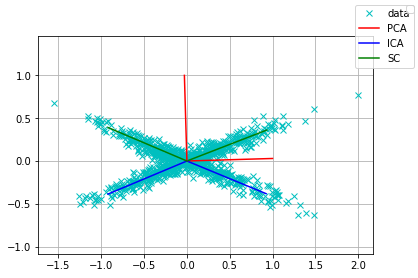

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
p_data = ax.plot(X[0], X[1], 'xc')
ax.axis('equal')
Upca = Upca / np.sqrt((Upca**2).sum(axis=0))
Uica = Uica / np.sqrt((Uica**2).sum(axis=0))
Usc = Usc / np.sqrt((Usc**2).sum(axis=0))
labels=['data','PCA','ICA','SC']
handles = p_data
for i in range(2):
    p_pca, = ax.plot([0, Upca[0,i]], [0, Upca[1,i]], '-r')
    handles.append(p_pca)
    p_ica, = ax.plot([0, Uica[0,i]], [0, Uica[1,i]], '-b')
    handles.append(p_ica)
    p_sc, = ax.plot([0, Usc[0,i]], [0, Usc[1,i]], '-g')
    handles.append(p_sc)
        
ax.grid()
fig.legend(handles, labels)
fig.legend(loc="upper right")
plt.show()

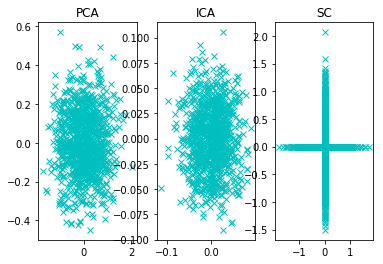

In [67]:
plt.subplot(1,3,1)
plt.plot(Apca[0], Apca[1], 'xc')
plt.title('PCA')
plt.subplot(1,3,2)
plt.plot(Aica[0], Aica[1], 'xc')
plt.title('ICA')
plt.subplot(1,3,3)
plt.plot(Asc[0], Asc[1], 'xc')
plt.title('SC')
plt.show()